In [3]:
import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

import os

import warnings
warnings.filterwarnings("ignore")

In [4]:
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False )

# 로지스틱 회귀 분석 연습 (20P)

##### 1. 데이터 구성하기

In [5]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/HMEQ.csv", encoding = "euc-kr")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


##### 2. 데이터 전처리

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [106]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [107]:
# 결측치 채우기
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

/tmp/ipykernel_5397/3165733095.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [108]:
# 데이터 분할
df_train, df_test = train_test_split(df_raw,
                                    test_size = 0.3, 
                                    random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


##### 3. 모델 및 회귀계수 검토

In [109]:
# 로지스틱 모델 생성
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG +
DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)

log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.2257
Time:                        19:49:08   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

##### 4. 예측 및 성능 평가

###### 예측

In [111]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), '\n')
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)), "\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)

y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)), "\n")

Train 예측 결과 
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int64 

Confusion Matrix: 
[[2365   17]
 [ 190   51]] 

Test 예측 결과 
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64 

Confusion Matrix: 
[[1017    4]
 [  81   23]] 



###### 평가

In [112]:
# 실제 train 데이터와 예측결과 비교
print('Train 예측/분류 결과')
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["BAD"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)), "\n")
print(classification_report(df_train["BAD"], y_pred_train_class, digits = 3))
      
# 실제 test 데이터와 예측 결과 비교
print('Test 예측/분류 결과')
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["BAD"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)), "\n")
print(classification_report(df_test["BAD"], y_pred_test_class, digits = 3))

Train 예측/분류 결과
Accuracy: 0.921

Confusion Matrix: 
[[2365   17]
 [ 190   51]] 

              precision    recall  f1-score   support

           0      0.926     0.993     0.958      2382
           1      0.750     0.212     0.330       241

    accuracy                          0.921      2623
   macro avg      0.838     0.602     0.644      2623
weighted avg      0.909     0.921     0.900      2623

Test 예측/분류 결과
Accuracy: 0.924

Confusion Matrix: 
[[1017    4]
 [  81   23]] 

              precision    recall  f1-score   support

           0      0.926     0.996     0.960      1021
           1      0.852     0.221     0.351       104

    accuracy                          0.924      1125
   macro avg      0.889     0.609     0.656      1125
weighted avg      0.919     0.924     0.904      1125



##### 5. 결론 도출 

###### 최종 회귀식

<Axes: >

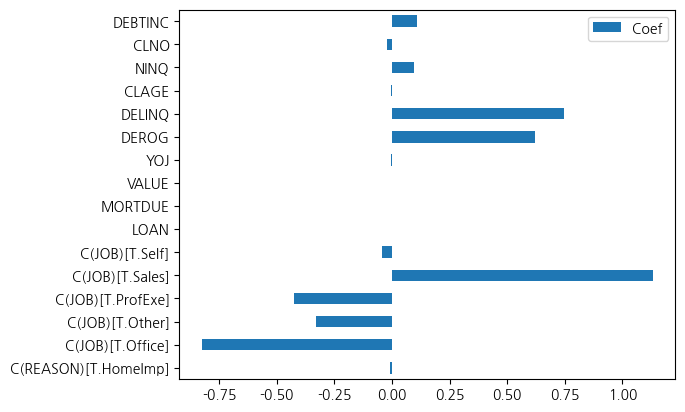

In [113]:
# 최종 회귀식

# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef" : log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

###### 표준화 회귀 계수

In [114]:
# 특정 변수 타입을 선택/제외하여 데이터 추출
df_char = df_raw.select_dtypes(include = 'object')
df_numeric = df_raw.select_dtypes(exclude = 'object')

In [12]:
# 데이터 스케일링
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

# 문자 데이터 + 숫자 데이터
df_scaled =pd.concat([df_numeric_scaled, df_char], axis =1 )
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [115]:
# BAD 데이터를 0과 1로 변환
df_scaled["BAD"] = np.where(df_scaled["BAD"] > 0,1,0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [116]:
# 데이터 분할
df_scaled_train, df_scaled_test = train_test_split(df_scaled,
                                                  test_size = 0.3, 
                                                  random_state = 1234)

In [15]:
# from_formula 함수를 이용하여 변수 역할 지정
scaled_log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG +
DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_scaled_train)

# 적합
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Thu, 18 May 2023   Pseudo R-squ.:                  0.2257
Time:                        16:06:39   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4815      0.205    -12.111      0.000      -2.883      -2.080

<Axes: >

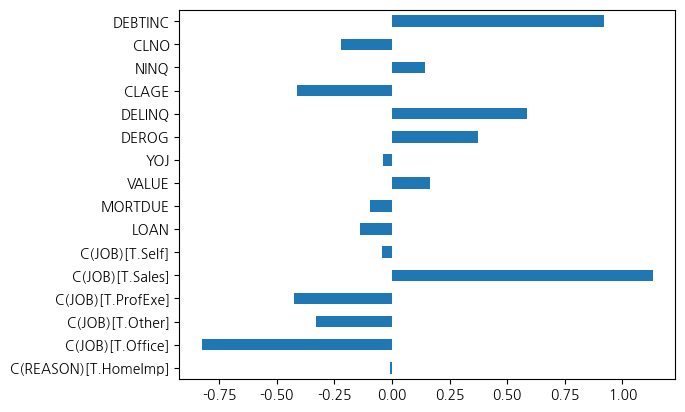

In [16]:
# 설명변수 중요도
df_log_scaled_coef = pd.DataFrame({"Coef" : scaled_log_result.params.values[1:]},
                                 index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)

# 로지스틱 회귀 분석 실습

##### 1. 데이터 구성하기

In [17]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/통신고객이탈.csv", encoding = "euc-kr")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


##### 2. 데이터 전처리

In [18]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [19]:
# 종속변수(CHURN) 열의 데이터 확인
df_raw["CHURN"].unique()

array(['Active', 'Churned'], dtype=object)

In [20]:
# Active는 0, Churned는 1로 데이터 변환
df_raw["CHURN"] = df_raw["CHURN"].map({"Active": 0, "Churned": 1})

In [21]:
# 바뀐 데이터 확인
df_raw["CHURN"].unique()

array([0, 1])

In [22]:
# 데이터 스플릿
df_train, df_test = train_test_split(df_raw,
                                    test_size = 0.3, 
                                    random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (651, 15)
test data size : (279, 15)


In [23]:
# 로지스틱 회귀 분석 
log_model = Logit.from_formula("""CHURN ~ C(CUSTOMER_ID) + C(GENDER) + C(AGE) + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + 
SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME
""", df_train)

log_result = log_model.fit()
print(log_result.summary())

/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/piai/anaconda3/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [ ]:
## 객체내용 확인함수

vars(df_raw)

In [ ]:
## 객체내용 확인함수

dir(df_raw)

## 의사결정나무 연습

##### 1. 데이터 구성하기

In [24]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/HMEQ.csv", encoding = "euc-kr")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [25]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [26]:
# 범주형 변수인 JOB의 결측치는 Other로 입력
df_raw["JOB"].fillna("Other", inplace = True)
# 연속형 데이터는 평균값으로 결측치 대체
df_raw.fillna(df_raw.mean(), inplace = True)

/tmp/ipykernel_5397/3605808036.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [27]:
# 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [28]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (3748, 18)
분할 후 설명변수 데이터 : Train (2623, 18) Test (1125, 18)


##### SMOTE로 데이터 오버샘플링

BAD
0      3403
1       345
dtype: int64 

BAD = 1 비율 BAD
False    0.907951
True     0.092049
dtype: float64


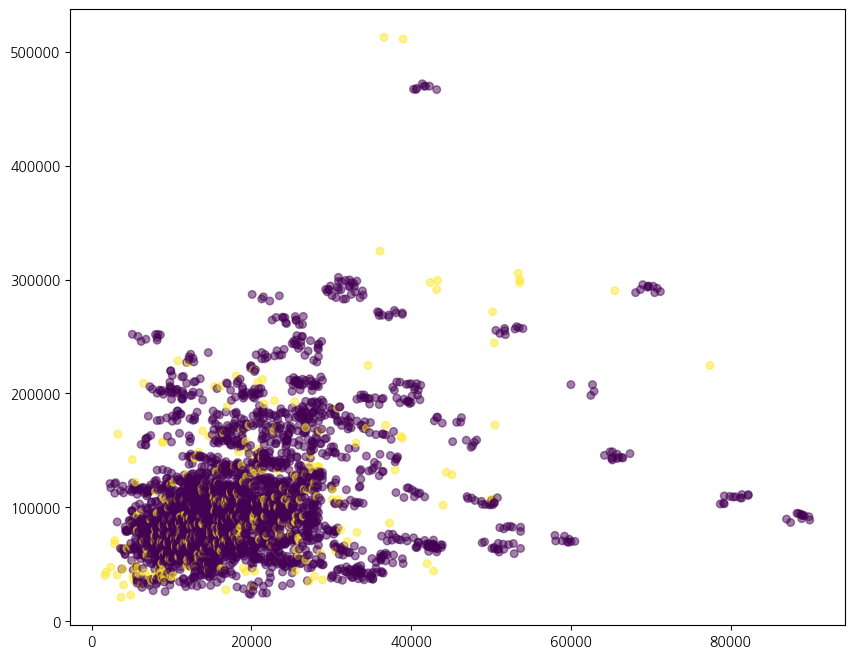

In [118]:
# 목표변수 빈도 확인
print(df_raw.value_counts(["BAD"]), "\n")
print("BAD = 1 비율" , df_raw.value_counts(df_raw["BAD"]==1)/len(df_raw))

# 목표변수 산점도 확인
plt.figure(figsize=(10,8))
# plt.scatter(df_raw["LOAN"], df_raw["VALUE"], c= df_raw['BAD'], s = 10)
plt.scatter(df_raw["LOAN"], df_raw["VALUE"], c= df_raw['BAD'], s = 30 , alpha = 0.5)
plt.show()

In [30]:
# Over-sampling 설정
sm = SMOTE(sampling_strategy='auto')
# train 데이터를 이용한 Over-sampling
x_resampled, y_resampled = sm.fit_resample(df_train_x , df_train_y)

# 결과확인
print('Over-Sampling 전: \n', df_train_y.value_counts(), "\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후:Train Y:{}\n'.format(y_resampled.shape))
print('Over-Sampling 후 "1":{}'.format(sum(y_resampled==1)))
print('Over-Sampling 후 "0":{}'.format(sum(y_resampled==0)))

Over-Sampling 전: 
 0    2382
1     241
Name: BAD, dtype: int64 

Over-Sampling 후 Train X:(4764, 18)
Over-Sampling 후:Train Y:(4764,)

Over-Sampling 후 "1":2382
Over-Sampling 후 "0":2382


    LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  27600   103898  130784.0  11.0      0     0.0  147.128398   0.0    29   
1  30200    80951  116160.0  19.0      4     0.0  130.360362   0.0    58   
2   5700    74172   79846.0   0.0      0     0.0  157.009775   0.0    28   
3  14900    22245   31531.0   7.0      0     0.0   91.074218   0.0    16   
4  30500    57516  103086.0   3.0      0     0.0  166.199527   2.0    24   

     DEBTINC  REASON_DebtCon  REASON_HomeImp  JOB_Mgr  JOB_Office  JOB_Other  \
0  42.009814               1               0        0           1          0   
1  50.352999               1               0        0           0          0   
2  47.415229               1               0        0           0          0   
3  21.620580               1               0        0           1          0   
4  37.814089               1               0        0           1          0   

   JOB_ProfExe  JOB_Sales  JOB_Self  BAD  
0            0     

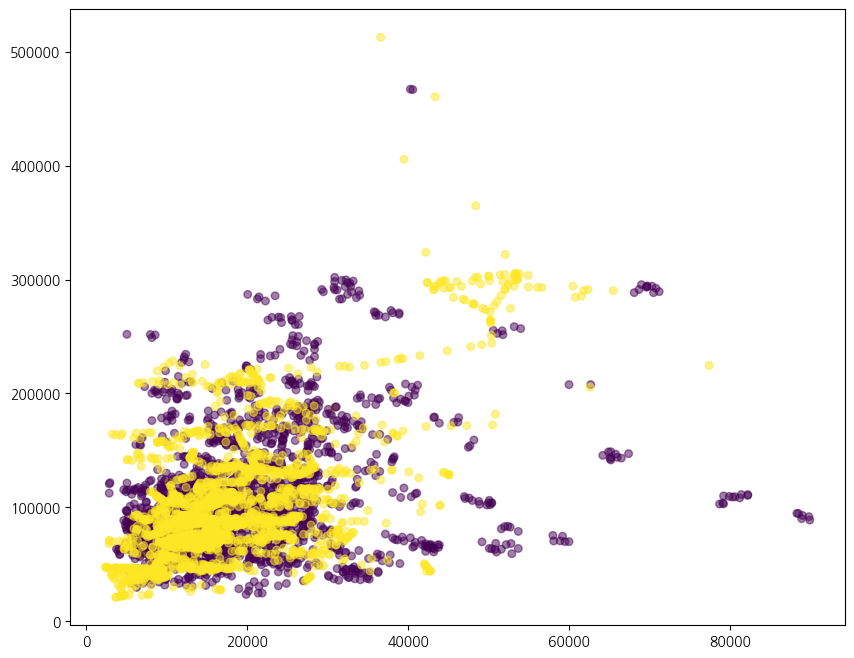

In [31]:
# 데이터 결합
df_resampled = pd.concat([x_resampled, y_resampled], axis = 1)
print(df_resampled.head())

# 목표변수 산점도 결합
plt.figure(figsize=(10,8))
plt.scatter(df_resampled['LOAN'], df_resampled['VALUE']
           , c=df_resampled['BAD'], s=30, alpha = 0.5)
plt.show()

##### 2. 모델 생성

In [32]:
# 기본 옵션으로 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.932


In [33]:
# 현재 생성된 모델의 옵션 확인
print(tree_uncustomized.get_params().keys())
print(tree_uncustomized.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


###### max_depth 파라미터 조정

- 최대 깊이는 4와 6 비교후 4로 선정

In [34]:
train_accuracy = [] ; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


In [35]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


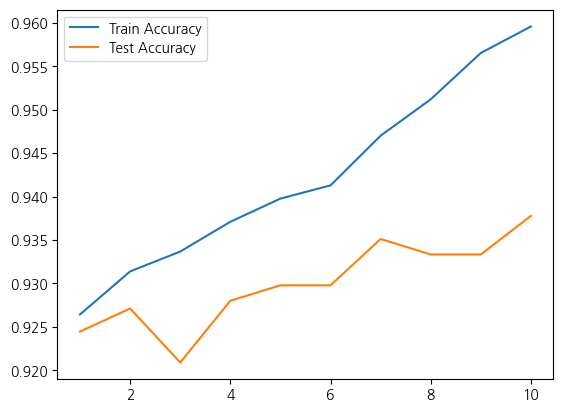

In [36]:
# 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle ="-", label = "Test Accuracy")
plt.legend()

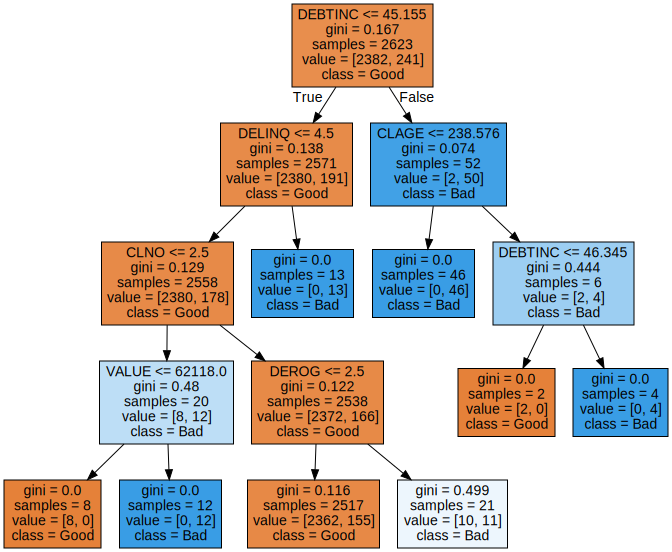

In [37]:
# 최대 깊이가 4인 모델 의사결정나무 확인
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 4 , random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot" , class_names = ['Good', 'Bad'], 
               feature_names = v_feature_name , impurity = True , filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

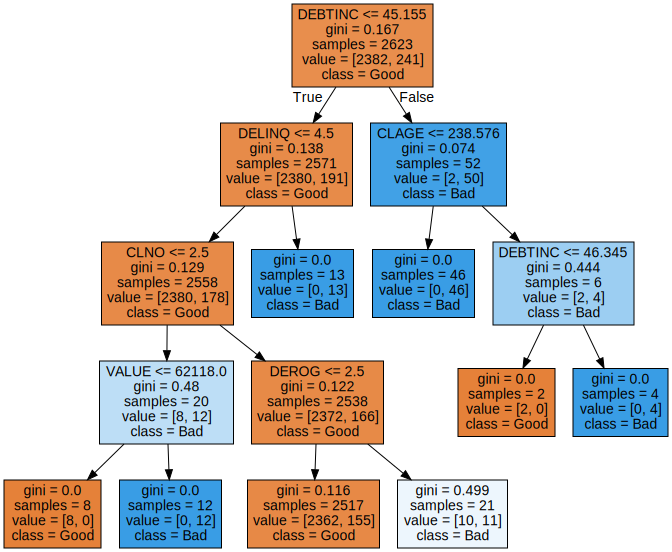

In [119]:
# 최대 깊이가 6인 모델 의사결정나무 확인
tree_high = DecisionTreeClassifier(max_depth = 4 , random_state = 1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file = "tree_high.dot" , class_names = ['Good', 'Bad'], 
               feature_names = v_feature_name , impurity = True , filled = True)

with open("tree_high.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

###### min_samples_split 파라미터 조정

- 스플릿 노드의 최소 자료 수는 20와 30 비교 후 20으로 선정

In [38]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split , max_depth = 6 , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [120]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.941,0.929
1,20,0.939,0.926
2,30,0.934,0.918
3,40,0.934,0.918
4,50,0.934,0.918
5,60,0.934,0.918
6,70,0.934,0.918
7,80,0.934,0.918
8,90,0.934,0.918
9,100,0.934,0.918


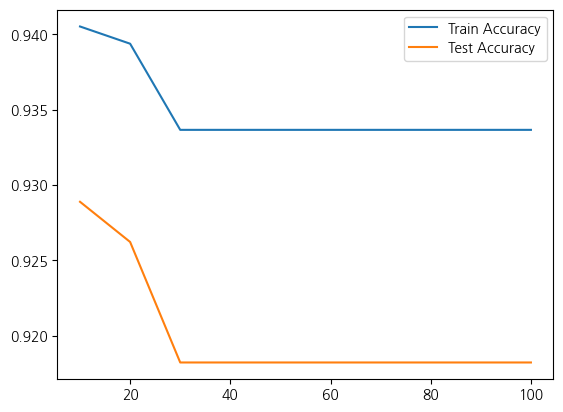

In [40]:
# 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

In [41]:
# 분리 노드의 최소 자료수가 20인 모델
tree_low = DecisionTreeClassifier(max_depth = 6 , min_samples_split = 20, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=1234)

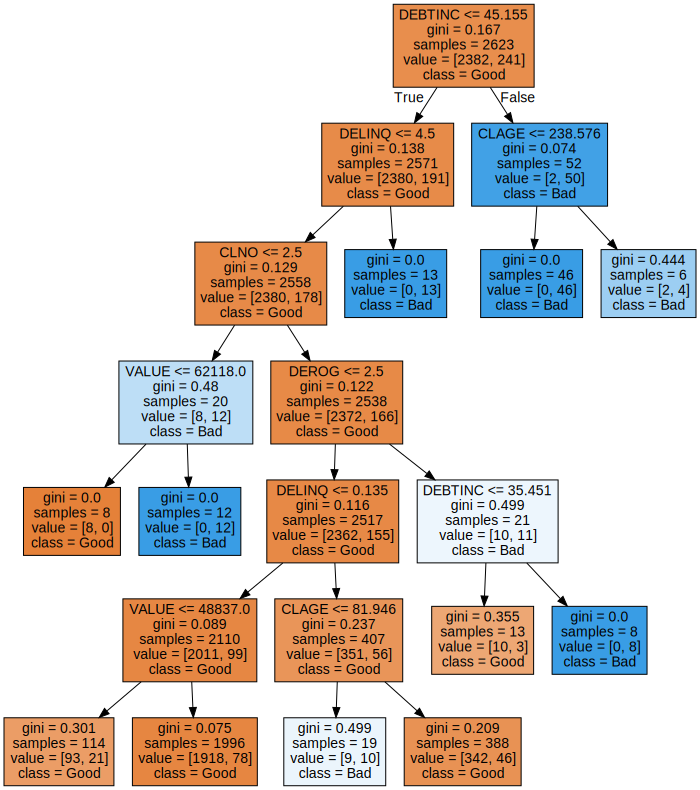

In [42]:
# 분리 노드의 최소 자료수가 20인 모델
export_graphviz(tree_low, out_file = "tree_low.dot" , class_names = ["Good", "Bad"], 
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [43]:
# 분리 노드의 최소 자료수가 30인 모델

tree_high = DecisionTreeClassifier(max_depth = 6 , min_samples_split = 30, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)


DecisionTreeClassifier(max_depth=6, min_samples_split=30, random_state=1234)

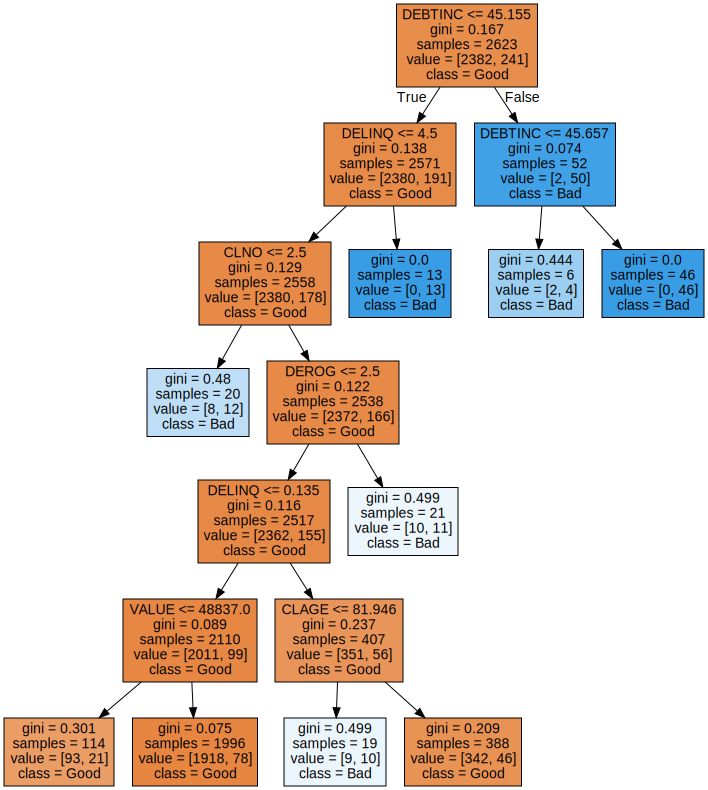

In [44]:
# 분리 노드의 최소 자료수가 30인 모델
export_graphviz(tree_high, out_file = "tree_high.dot" , class_names = ["Good", "Bad"], 
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

###### min_samples_leaf 파라미터 조정

- 잎사귀 노드의 최소 자료 수는 8와 10 비교 후 10으로 선정

In [122]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf , min_samples_split = 20, max_depth = 6 , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [123]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.939,0.926
1,4,0.939,0.926
2,6,0.939,0.926
3,8,0.939,0.926
4,10,0.938,0.927
5,12,0.934,0.918
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


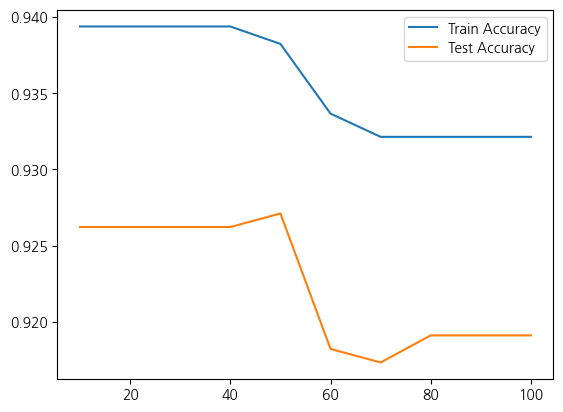

In [124]:
# 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

In [125]:
# 잎사귀 노드의 최소 자료수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth = 6 , min_samples_split = 20, min_samples_leaf = 8,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=20,
                       random_state=1234)

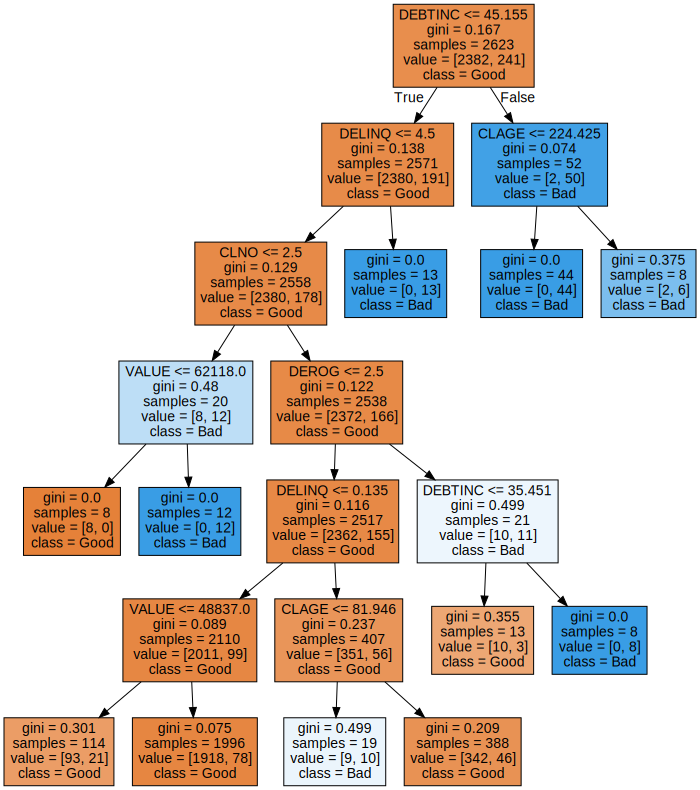

In [126]:
# 잎사귀 노드의 최소 자료수가 8인 모델
export_graphviz(tree_low, out_file = "tree_low.dot" , class_names = ["Good", "Bad"], 
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [128]:
# 잎사귀 노드의 최소 자료수가 10인 모델
tree_high = DecisionTreeClassifier(max_depth = 6 , min_samples_split = 20, min_samples_leaf = 10,random_state = 1234)
tree_high.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=20,
                       random_state=1234)

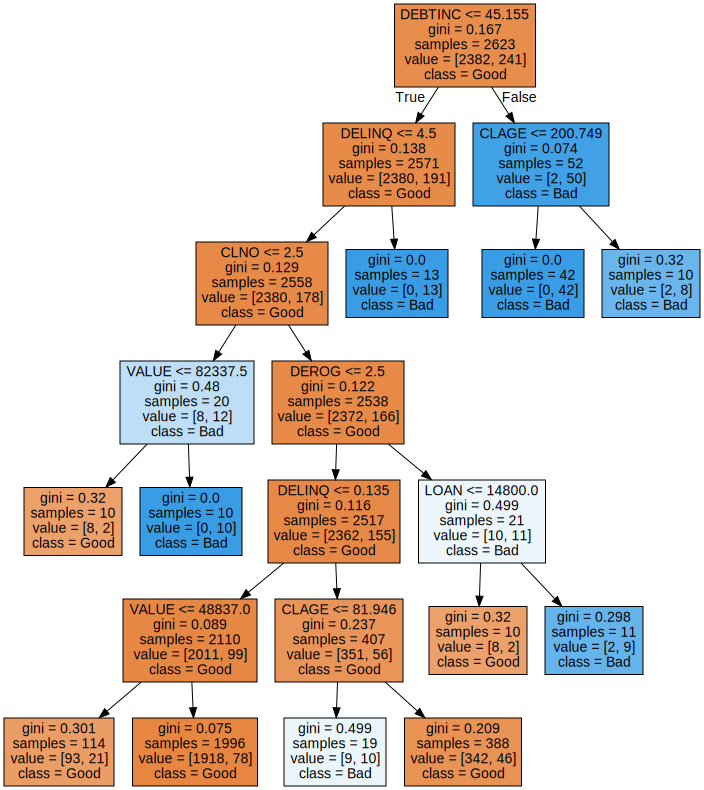

In [129]:
# 잎사귀 노드의 최소 자료수가 10인 모델
export_graphviz(tree_high, out_file = "tree_high.dot" , class_names = ["Good", "Bad"], 
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

##### 3. 최종 모델 선정

In [130]:
# 최종 모델 
tree_final = DecisionTreeClassifier(max_depth = 6 , min_samples_split = 20, min_samples_leaf = 10,random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=20,
                       random_state=1234)

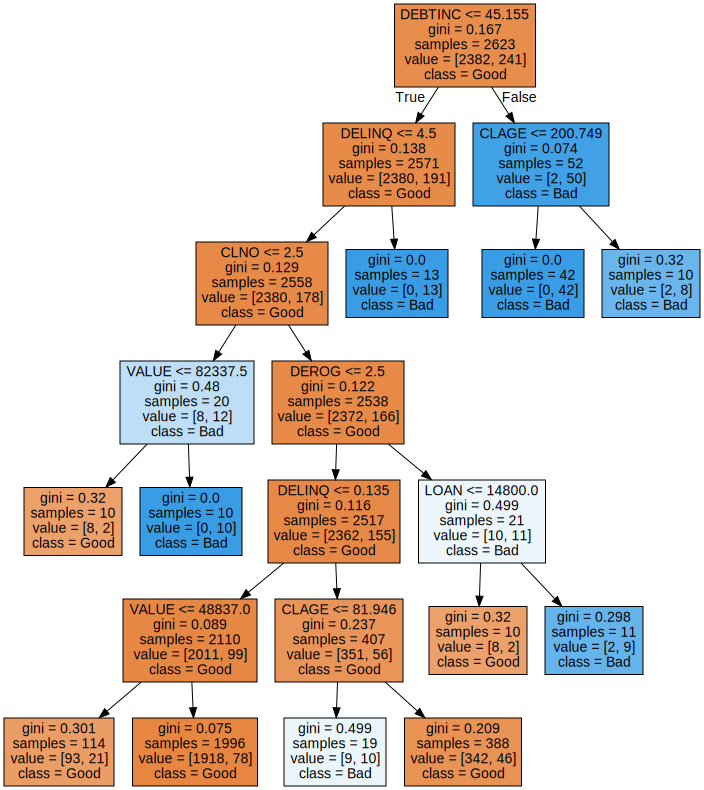

In [131]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file = "tree_final.dot" , class_names = ["Good", "Bad"], 
               feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [132]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n {}\n".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.927

Confusion matrix:
 [[1013    8]
 [  74   30]]



In [133]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.932     0.992     0.961      1021
           1      0.789     0.288     0.423       104

    accuracy                          0.927      1125
   macro avg      0.861     0.640     0.692      1125
weighted avg      0.919     0.927     0.911      1125



In [135]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.535
5,DELINQ,0.187
8,CLNO,0.076
2,VALUE,0.073
4,DEROG,0.059
6,CLAGE,0.044
0,LOAN,0.027
7,NINQ,0.000
3,YOJ,0.000
1,MORTDUE,0.000


Text(0, 0.5, '설명변수')

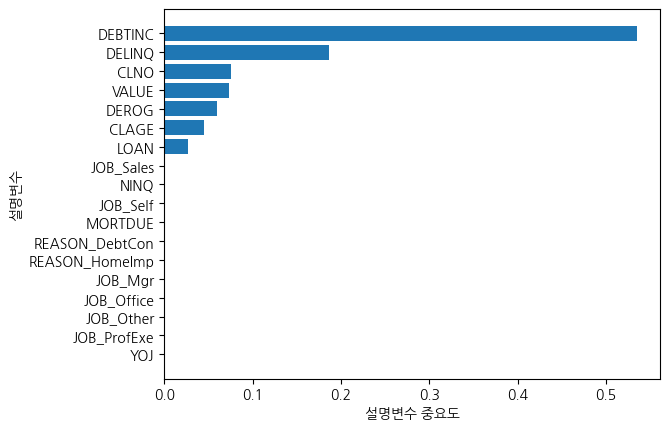

In [136]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh( y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [137]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeClassifier()

param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf }

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy" , n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest prameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10)

best prameter: 
{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}

best score: 
0.936


# 랜덤 포레스트

#### 모델 생성

In [48]:
# 기본 옵션으로 모델생성
rf_uncutomized = RandomForestClassifier(random_state = 1234)
rf_uncutomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(rf_uncutomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(rf_uncutomized.score(df_test_x, df_test_y)))


Accuracy on training set:1.000
Accuracy on test set:0.946


In [49]:
# 랜덤 포레스트의 모델 옵션확인
print(rf_uncutomized.get_params().keys())
print(rf_uncutomized.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 1234, 0, False])


In [138]:
# n_estimators : 트리 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [52]:
# 모델 정확도 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


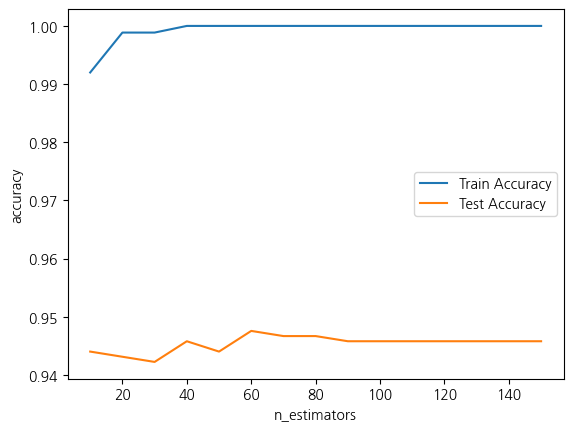

In [53]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle = "-" , label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "-" , label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [59]:
# error 저장 리스트
oob_error = []

for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True , random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs 

Text(0.5, 0, 'n_estimators')

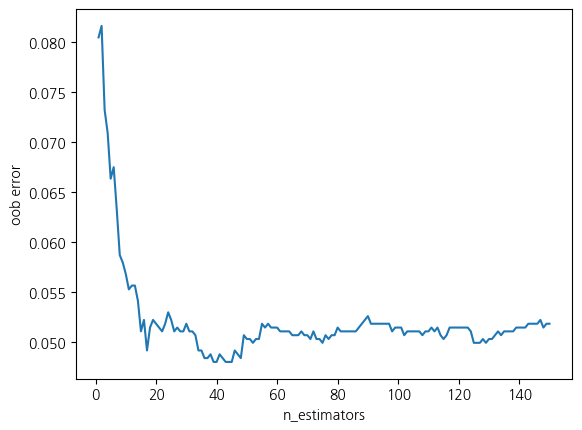

In [60]:
# 그래프로 표현
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [80]:
#  max_depth: 최대 깊이 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 100 , random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy


In [81]:
#  모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.938,0.931
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.949,0.936
8,9,0.951,0.935
9,10,0.956,0.938


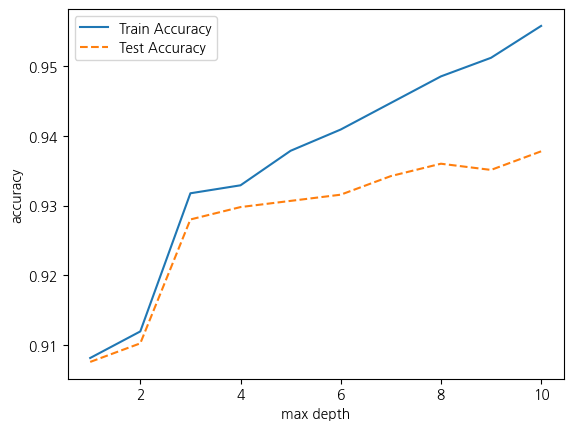

In [82]:
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

In [144]:
# min_samples_split :  노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_split = [n_split * 5 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 6 ,
                                n_estimators = 100 , random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy


In [145]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,5,0.941,0.931
1,10,0.940,0.931
2,15,0.936,0.931
3,20,0.935,0.931
4,25,0.934,0.931
5,30,0.934,0.931
6,35,0.934,0.931
7,40,0.934,0.931
8,45,0.934,0.931
9,50,0.933,0.931


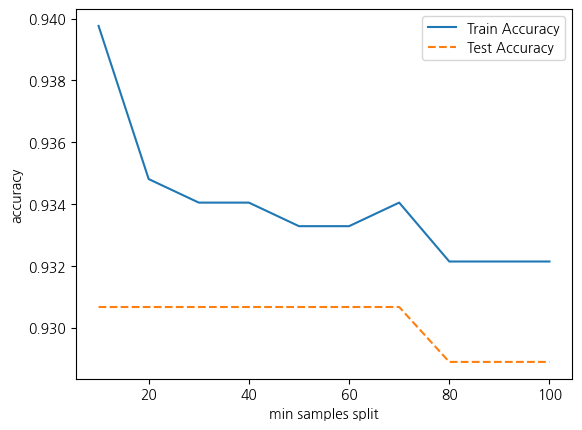

In [85]:
# 모델 정확도 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [86]:
# min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 6 ,
                               n_estimators = 100 , random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy


In [87]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.939,0.932
1,2,0.933,0.930
2,3,0.927,0.927
3,4,0.927,0.925
4,5,0.927,0.925
5,6,0.926,0.924
6,7,0.926,0.924
7,8,0.925,0.924
8,9,0.923,0.921
9,10,0.914,0.915


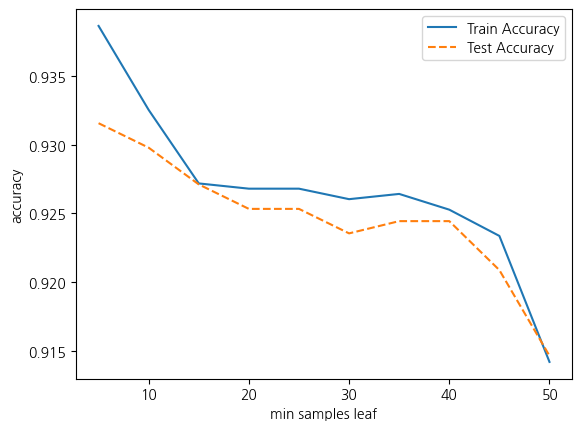

In [88]:
# 모델 정확도 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

##### 결론도출

In [91]:
# 최종 모델
rf_final = RandomForestClassifier(min_samples_leaf = 20, max_depth = 6 , n_estimators = 100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

In [93]:
print("Accuracy on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set : 0.927
Accuracy on test set : 0.925

Confusion matrix: 
[[1021    0]
 [  84   20]]
              precision    recall  f1-score   support

           0      0.924     1.000     0.960      1021
           1      1.000     0.192     0.323       104

    accuracy                          0.925      1125
   macro avg      0.962     0.596     0.642      1125
weighted avg      0.931     0.925     0.902      1125



In [94]:
# 설명변수의 중요도
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.502
5,DELINQ,0.148
6,CLAGE,0.064
4,DEROG,0.058
8,CLNO,0.056
7,NINQ,0.050
0,LOAN,0.036
2,VALUE,0.036
3,YOJ,0.016
1,MORTDUE,0.014


Text(0, 0.5, '설명변수')

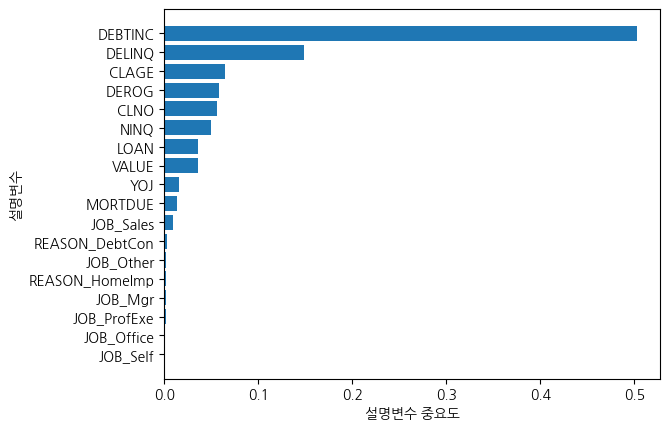

In [95]:
# 설명변수 중요도 그래프
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [99]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestClassifier(n_estimators=100, random_state = 1234)

param_grid = {"max_depth": para_depth,
             "min_samples_leaf": para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy" , n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest prameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=9, min_samples_leaf=5, random_state=1234)

best prameter: 
{'max_depth': 9, 'min_samples_leaf': 5}

best score: 
0.935
